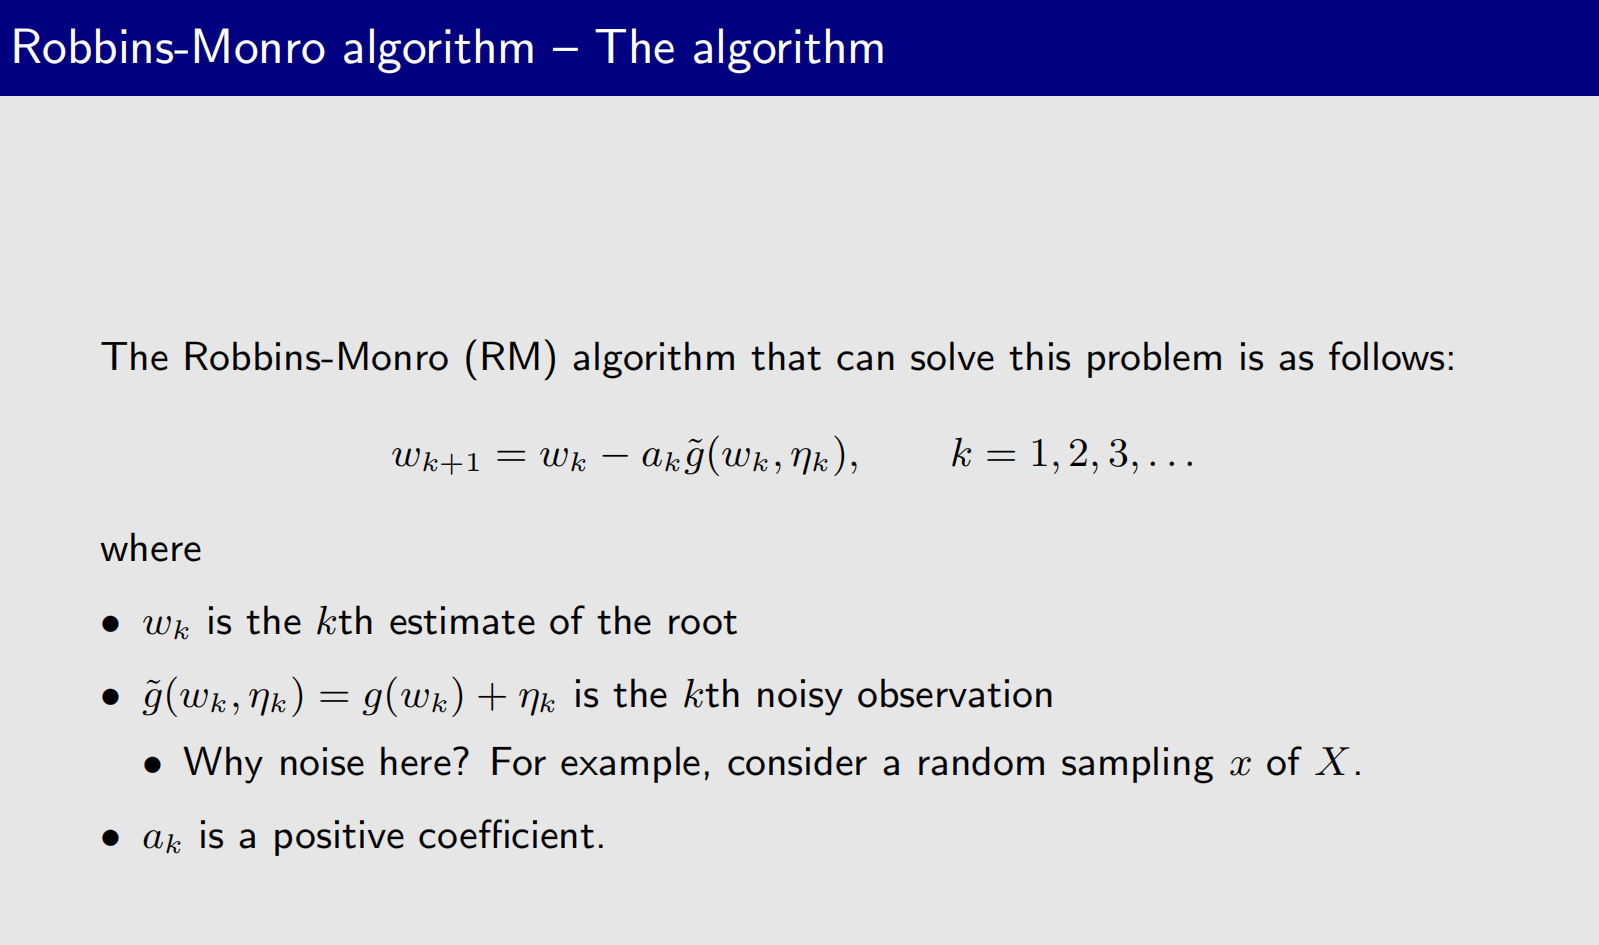


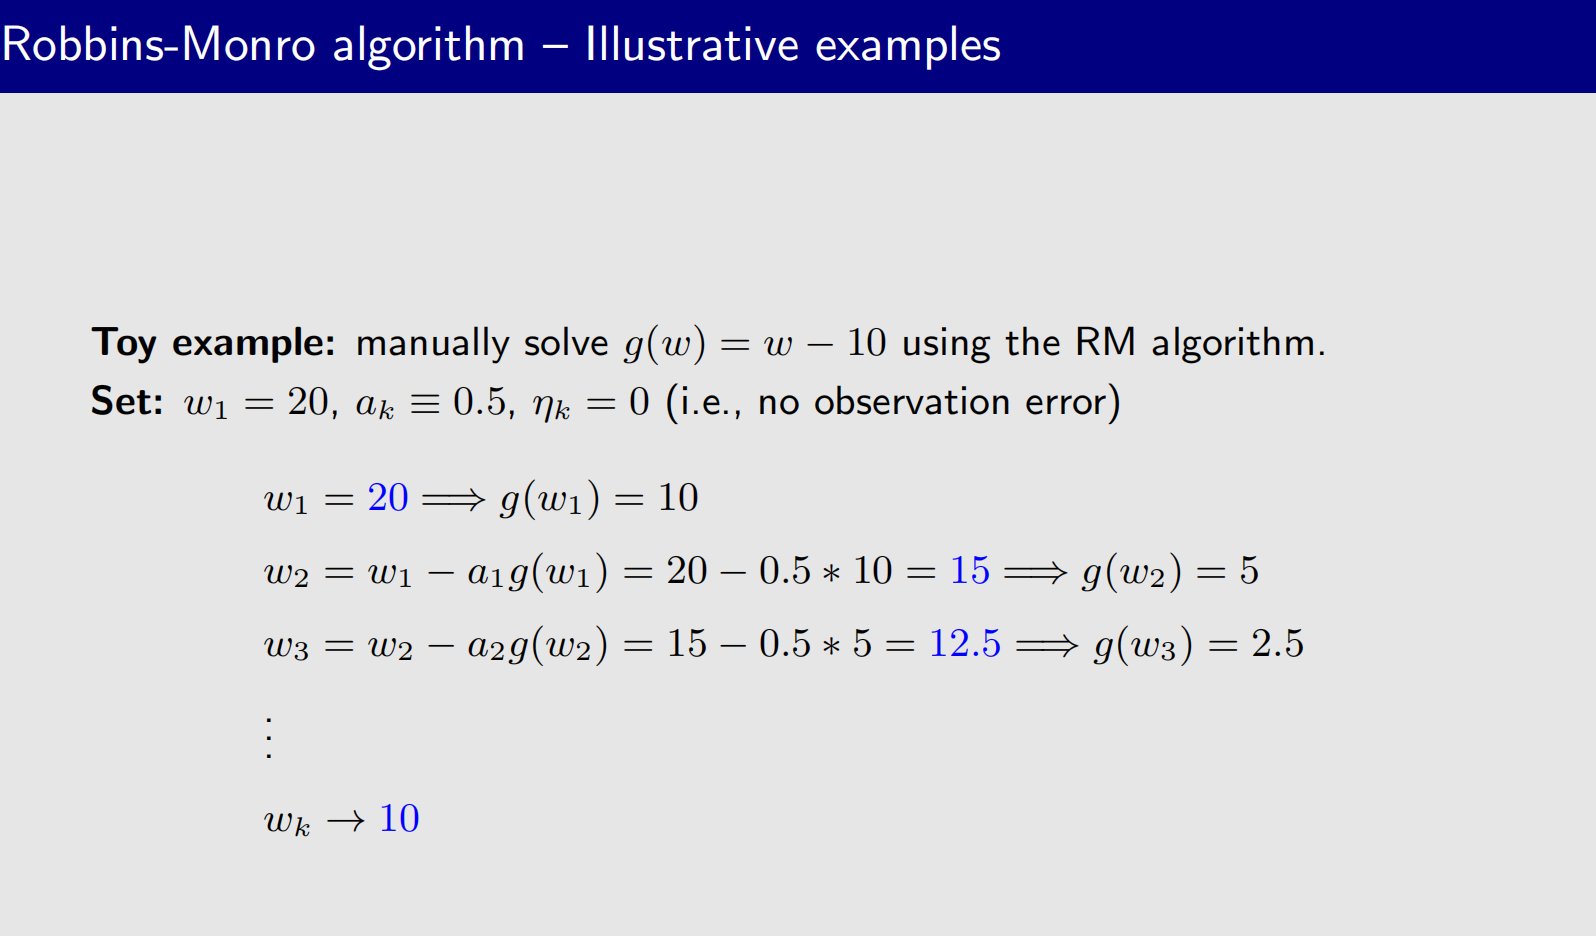


In [1]:
import numpy as np

In [105]:
"""
求g(w) = 0 的根
例题：g(w) = w - 10。那么g(w)的根为10

将g(w)看作导数函数，g(w)导数为正数，则g(w)是单调递增，则原函数f(w)为凸函数，所以也是梯度下降
"""
w = 20
alpha = 0.30196896
eta = 0.5
iters = 10000

for i in range(iters):
    g_w = w - 10
    g_tilde = g_w + eta
    # 无噪音情况下，a_k 取恒定值
    # 有噪音情况下，a_k 每次迭代要更新，取对了值才能收敛到正确的解，取值不对收敛不到
    a_k = (alpha / (i + 1))
    w = w - a_k * g_tilde

print(w)

10.000000034699635


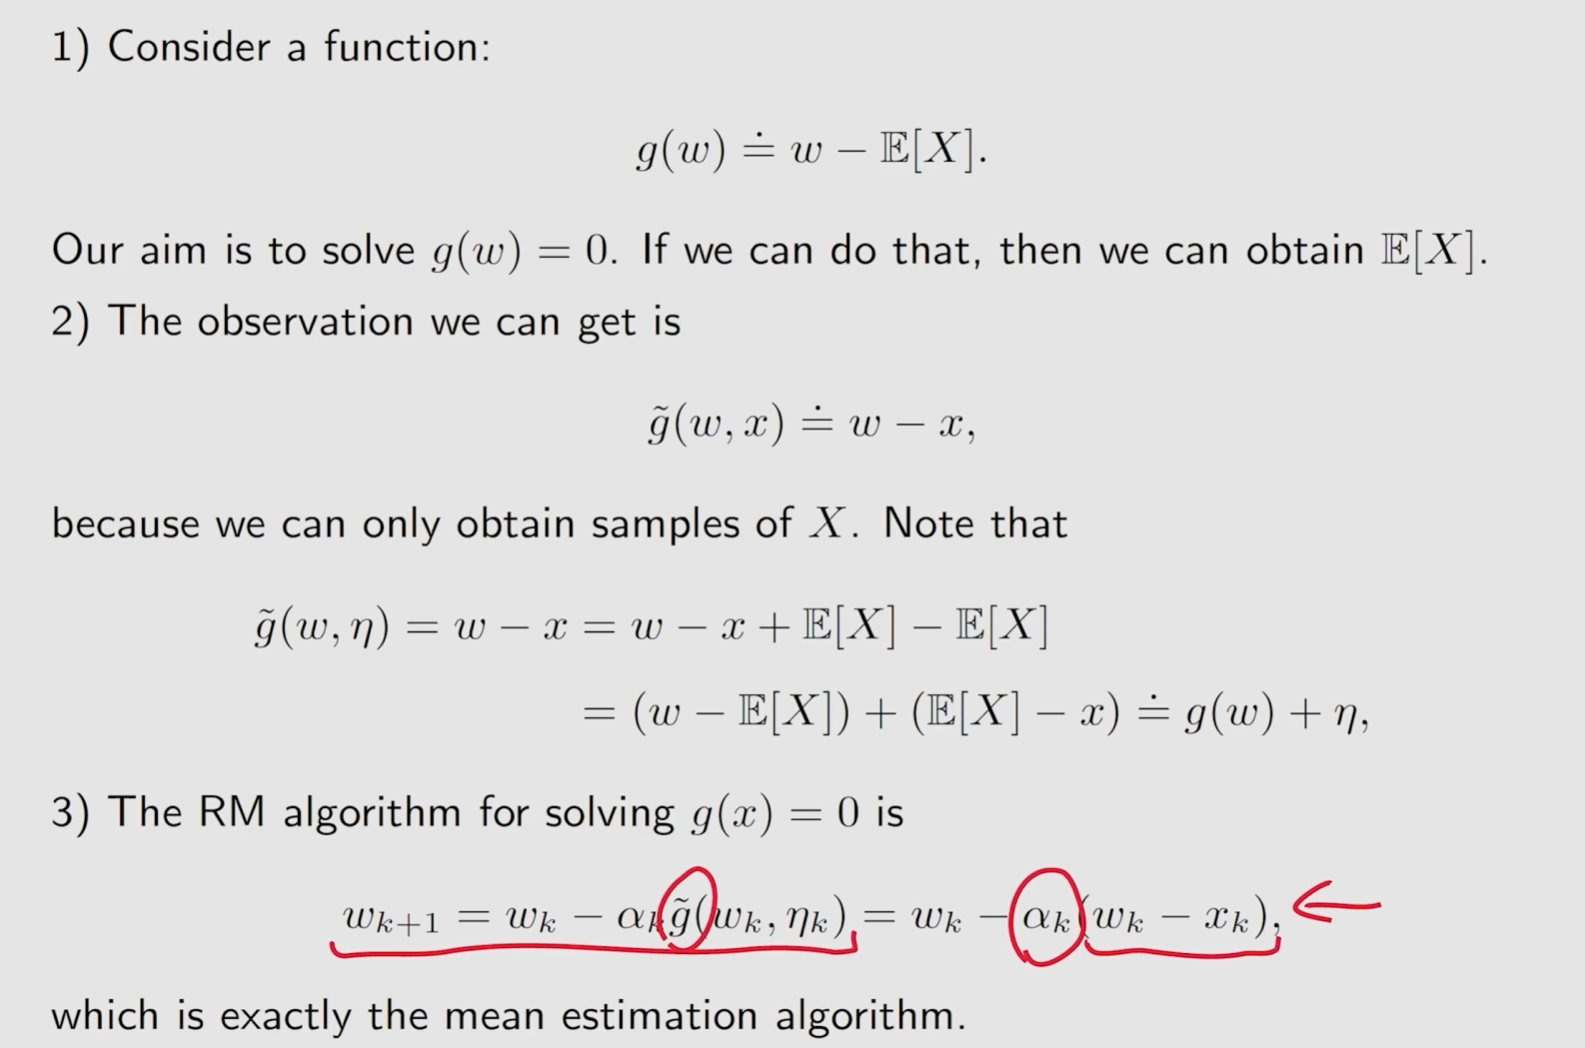

In [304]:
"""
对g_tilde(w, eta)进一步剖析，发现与g(w)有联系，是对g(w)的有噪音观测
X 的方差相对于均值越小，w与E(X)越接近
"""

np.random.seed(0)
X_size = 128
X = np.random.normal(1, 0.1, size=(X_size, ))
E_X = X.mean()  # E(X)

w = 20
alpha = 0.2
iters = 1000

for i in range(iters):
    idx = np.random.randint(X_size)
    eta = E_X - X[idx]
    g_w = w - E_X
    g_tilde = g_w + eta
    w = w - alpha * g_tilde
print(E_X)
print(w)
print(np.abs(E_X - w))

1.0135820047825266
1.082482881245309
0.06890087646278231


In [305]:
"""
mini batch
"""
np.random.seed(0)
X_size = 128
X = np.random.normal(1, 0.1, size=(X_size, ))
E_X = X.mean()  # E(X)

w = 20
alpha = 0.2
iters = 1000
batch_size = 16

for i in range(iters):
    ids = [np.random.randint(X_size) for _ in range(batch_size)]
    eta = E_X - X[ids]
    g_w = w - E_X
    g_tilde = g_w + eta
    w = w - alpha * g_tilde.mean()
print(E_X)
print(w)
print(np.abs(E_X - w))

1.0135820047825266
1.019368330966529
0.005786326184002322
